# Data Preprocessing tutorial
Learning outcome - to be able to conduct basic data preprocessing for data in digital health

# 1. Data Profiling

use "pip install ydata-profiling" to install the ydata-profiling package

In [4]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from PIL import Image
import os

In [5]:
# Load a Sample Dataset (Use your own file path)
data = pd.read_csv('heart.csv')

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,273.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,150.256410,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.154854,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,154.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [13]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150.0,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,NaN,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129.0,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187.0,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172.0,0,1.4,1,0,normal,0


In [15]:
data.isnull()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
missing_percentage = data['thalach'].isnull().mean() * 100
print(f"Percentage of missing data in 'thalach': {missing_percentage:.2f}%")

In [23]:
missing_percentage = data['thalach'].isnull().mean() * 100
print(f"Percentage of missing data in'thalach': {missing_percentage}%")

Percentage of missing data in'thalach': 9.900990099009901%


<img src="heart_columns.png" />

In [26]:
# Let's introduce some missing values in a column
column_to_modify = 'thalach'
missing_fraction = 0.1  # 10% missing values

# Randomly select 10% of the indices for the specified column
data.loc[data.sample(frac=missing_fraction).index, column_to_modify] = np.nan

In [28]:
# Basic Overview of the Data
print("\nBasic Information:")
data.info()


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   247 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 33.3+ KB


In [30]:
print("\nFirst Five Rows:")
data.head()


First Five Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,NaN,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,NaN,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129.0,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187.0,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172.0,0,1.4,1,0,normal,0


In [32]:
# Summary Statistics
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,247.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,150.781377,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.430072,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,136.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,155.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,169.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [34]:
# Checking for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach     56
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


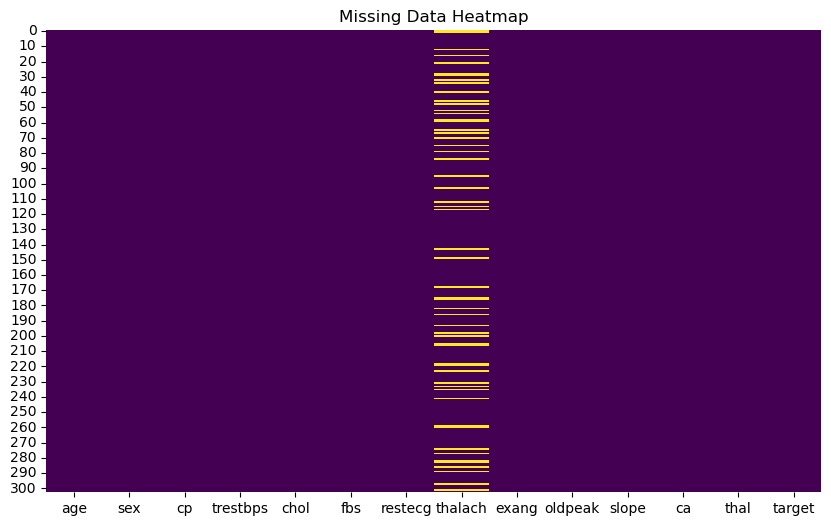

In [36]:
# Visualizing Missing Data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [44]:
# Generating a Detailed Data Profiling Report
profile = ProfileReport(data, title="Data Profiling Report", explorative=True)
profile.to_file("data_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Now you can open the data_profiling_report.html file in your code folder to see a detailed report.

Let's move onto imaging data

In [50]:
# Load an image
image_path = "MRI.jpeg"  # Replace with the path to your image file
image = Image.open(image_path)

In [52]:
# Display Basic Information About the Image
print("\nImage Information:")
print(f"Filename: {os.path.basename(image_path)}")
print(f"Format: {image.format}")
print(f"Dimensions: {image.size}")
print(f"Mode: {image.mode}")


Image Information:
Filename: MRI.jpeg
Format: WEBP
Dimensions: (1024, 604)
Mode: RGB


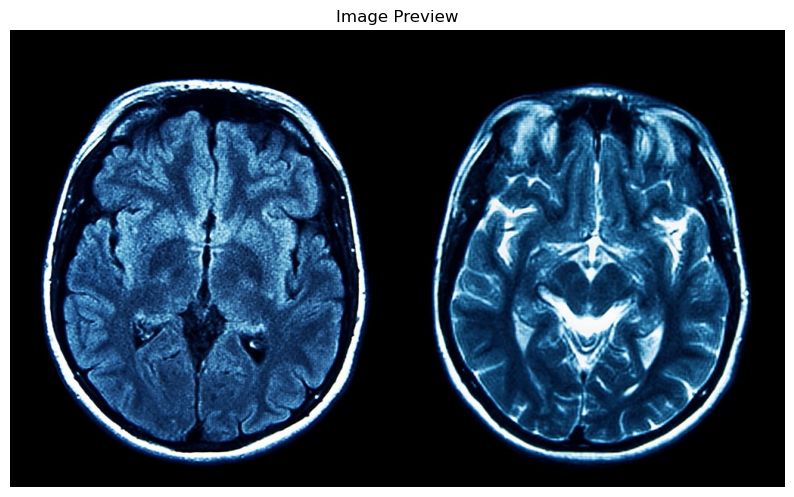

In [60]:
# Visualize the Image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("Image Preview")
plt.show()

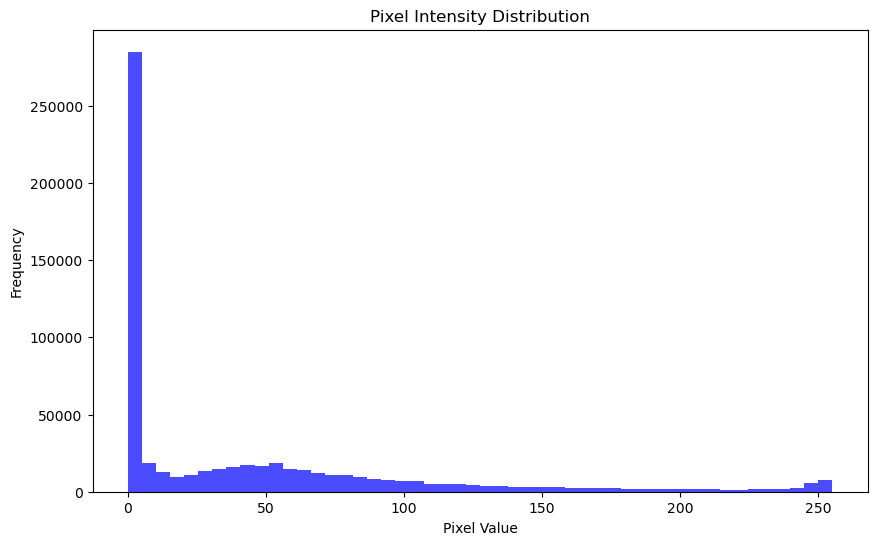

In [62]:
# Analyze Pixel Intensity Distribution (Grayscale Conversion)
gray_image = image.convert('L')  # Convert to grayscale
pixel_values = np.array(gray_image).flatten()

plt.figure(figsize=(10, 6))
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [58]:
print("\nBasic Pixel Intensity Stats:")
print(f"Mean: {np.mean(pixel_values):.2f}, Std: {np.std(pixel_values):.2f}, Min: {np.min(pixel_values)}, Max: {np.max(pixel_values)}")


Basic Pixel Intensity Stats:
Mean: 44.29, Std: 61.97, Min: 0, Max: 255


# 2. Denoising

In [64]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from PIL import Image, ImageFilter

In [66]:
# Load a Sample Dataset (Use your own file path)
data = pd.read_csv('ECG.csv')

# Display Original Data
print("\nOriginal Data:")
data.head()


Original Data:


,time,ecg
0,729.500,0.546875
1,729.501,0.553125
2,729.502,0.540625
3,729.503,0.537500
4,729.504,0.553125


In [70]:
# Use part of the data
print(data.shape)
data = data.iloc[:200, :]

(200, 2)


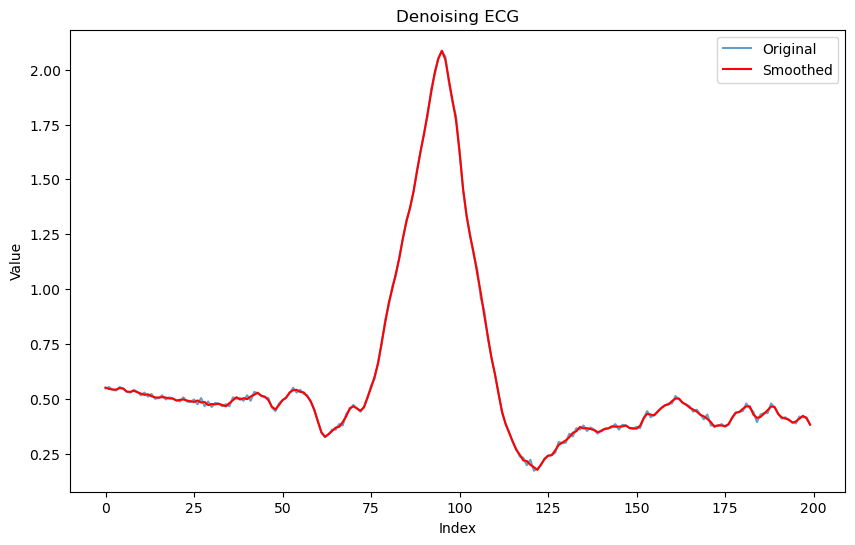

In [76]:
# Example: Apply Smoothing to a Noisy Numerical Column
column_to_denoise = 'ecg'

# Apply Savitzky-Golay Filter for Smoothing
data['smoothed_column'] = savgol_filter(data[column_to_denoise], window_length=5, polyorder=2)

# Visualize the Effect of Smoothing
plt.figure(figsize=(10, 6))
plt.plot(data[column_to_denoise], label="Original", alpha=0.7)
plt.plot(data['smoothed_column'], label="Smoothed", color="red")
plt.title("Denoising ECG")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

Let's have a look at the imaging data.


Image Information:
Filename: MRI.jpeg
Format: WEBP, Size: (1024, 604), Mode: RGB


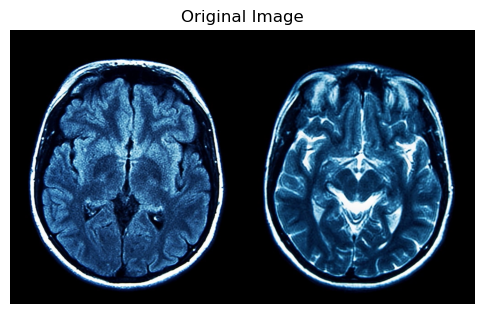

In [78]:
# Load and Display the Original Image
image_path = "MRI.jpeg"  # Replace with the path to your image file
original_image = Image.open(image_path)

print("\nImage Information:")
print(f"Filename: {image_path}")
print(f"Format: {original_image.format}, Size: {original_image.size}, Mode: {original_image.mode}")

plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.axis('off')
plt.title("Original Image")
plt.show()

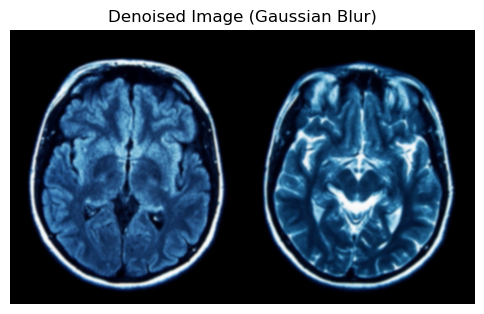

In [80]:
# Apply Denoising Techniques - Gaussian Blur
denoised_image = original_image.filter(ImageFilter.GaussianBlur(radius=2))

# Display the Denoised Image
plt.figure(figsize=(6, 6))
plt.imshow(denoised_image)
plt.axis('off')
plt.title("Denoised Image (Gaussian Blur)")
plt.show()

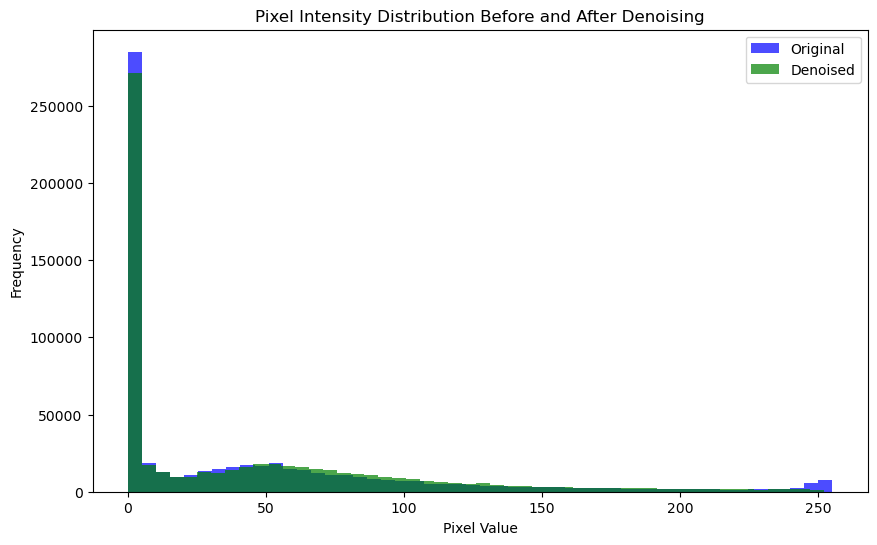


Pixel Intensity Stats - Original:
Mean: 44.29, Std: 61.97, Min: 0, Max: 255

Pixel Intensity Stats - Denoised:
Mean: 44.29, Std: 56.42, Min: 0, Max: 252


In [82]:
# Analyze Pixel Intensity Distribution Before and After Denoising
original_gray = original_image.convert('L')  # Convert to grayscale
denoised_gray = denoised_image.convert('L')

original_pixels = np.array(original_gray).flatten()
denoised_pixels = np.array(denoised_gray).flatten()

plt.figure(figsize=(10, 6))
plt.hist(original_pixels, bins=50, alpha=0.7, label="Original", color='blue')
plt.hist(denoised_pixels, bins=50, alpha=0.7, label="Denoised", color='green')
plt.title("Pixel Intensity Distribution Before and After Denoising")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("\nPixel Intensity Stats - Original:")
print(f"Mean: {np.mean(original_pixels):.2f}, Std: {np.std(original_pixels):.2f}, Min: {np.min(original_pixels)}, Max: {np.max(original_pixels)}")

print("\nPixel Intensity Stats - Denoised:")
print(f"Mean: {np.mean(denoised_pixels):.2f}, Std: {np.std(denoised_pixels):.2f}, Min: {np.min(denoised_pixels)}, Max: {np.max(denoised_pixels)}")


We can see the denoised image has lower standard deviation.

# Imputation

In [84]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [86]:
# Load a Sample Dataset (Use your own file path)
data = pd.read_csv('heart.csv')

In [88]:
# Let's introduce some missing values in a column
column_to_modify = ['age', 'thalach']
missing_fraction = 0.3  # 30% missing values

# Randomly select 30% of the indices for the specified column
data.loc[data.sample(frac=missing_fraction).index, column_to_modify] = np.nan

In [90]:
# Display Original Data with Missing Values
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
age         91
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach     91
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


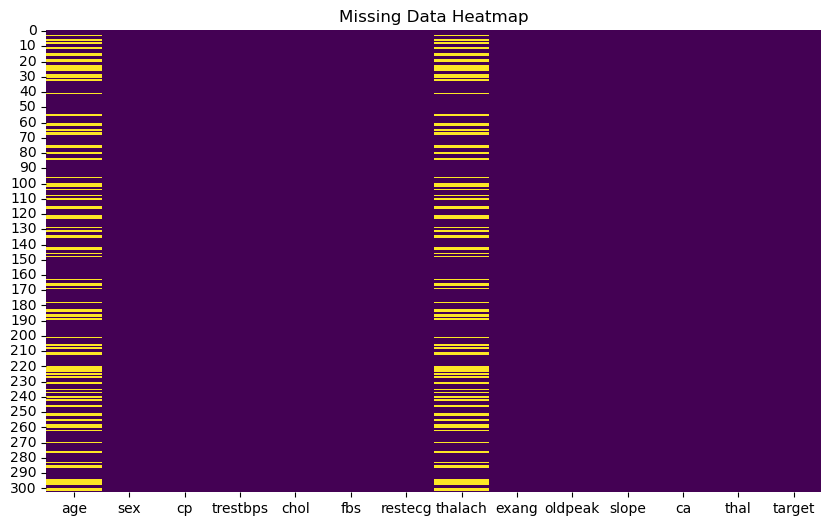

In [92]:
# Visualize Missing Data
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [94]:
# Select column(s) with missing values
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data = data[numerical_columns]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63.0,1,1,145,233,1,2,150.0,0,2.3,3,0,0
1,67.0,1,4,160,286,0,2,108.0,1,1.5,2,3,1
2,67.0,1,4,120,229,0,2,129.0,1,2.6,2,2,0
3,NaN,1,3,130,250,0,0,NaN,0,3.5,3,0,0
4,41.0,0,2,130,204,0,2,172.0,0,1.4,1,0,0


In [96]:
# Simple Imputation

# Impute Missing Values with Mean, Median, or Most Frequent
simple_imputer = SimpleImputer(strategy='mean')  # Change strategy to 'median' or 'most_frequent' as needed

# Applying the Imputer to the Dataset
data_simple = pd.DataFrame(simple_imputer.fit_transform(data), columns=numerical_columns)

print("\nData After Simple Imputation:")
data_simple.head()


Data After Simple Imputation:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63.000000,1.0,1.0,145.0,233.0,1.0,2.0,150.000000,0.0,2.3,3.0,0.0,0.0
1,67.000000,1.0,4.0,160.0,286.0,0.0,2.0,108.000000,1.0,1.5,2.0,3.0,1.0
2,67.000000,1.0,4.0,120.0,229.0,0.0,2.0,129.000000,1.0,2.6,2.0,2.0,0.0
3,54.537736,1.0,3.0,130.0,250.0,0.0,0.0,148.867925,0.0,3.5,3.0,0.0,0.0
4,41.000000,0.0,2.0,130.0,204.0,0.0,2.0,172.000000,0.0,1.4,1.0,0.0,0.0


In [98]:
# KNN Imputation

# Impute Missing Values Using K-Nearest Neighbors
knn_imputer = KNNImputer(n_neighbors=5)
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data), columns=numerical_columns)

print("\nData After KNN Imputation:")
data_knn_imputed.head()


Data After KNN Imputation:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,0.0
3,56.0,1.0,3.0,130.0,250.0,0.0,0.0,162.2,0.0,3.5,3.0,0.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0.0


In [102]:
# Multivariate Imputation by Chained Equations (MICE)

# Impute Missing Values Using Iterative Imputer (MICE)
iterative_imputer = IterativeImputer(max_iter=10, random_state=45)
data_mice_imputed = pd.DataFrame(iterative_imputer.fit_transform(data), columns=numerical_columns)

print("\nData After MICE Imputation:")
data_mice_imputed.head()


Data After MICE Imputation:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63.000000,1.0,1.0,145.0,233.0,1.0,2.0,150.000000,0.0,2.3,3.0,0.0,0.0
1,67.000000,1.0,4.0,160.0,286.0,0.0,2.0,108.000000,1.0,1.5,2.0,3.0,1.0
2,67.000000,1.0,4.0,120.0,229.0,0.0,2.0,129.000000,1.0,2.6,2.0,2.0,0.0
3,56.390625,1.0,3.0,130.0,250.0,0.0,0.0,136.730439,0.0,3.5,3.0,0.0,0.0
4,41.000000,0.0,2.0,130.0,204.0,0.0,2.0,172.000000,0.0,1.4,1.0,0.0,0.0



Comparison of Means Before and After Imputation:
          Original Mean  KNN Imputed Mean  MICE Imputed Mean
age           54.537736         54.601980          54.690684
sex            0.676568          0.676568           0.676568
cp             3.108911          3.108911           3.108911
trestbps     131.785479        131.785479         131.785479
chol         246.547855        246.547855         246.547855
fbs            0.148515          0.148515           0.148515
restecg        0.990099          0.990099           0.990099
thalach      148.867925        148.625743         148.613273
exang          0.326733          0.326733           0.326733
oldpeak        1.057756          1.057756           1.057756
slope          1.590759          1.590759           1.590759
ca             0.683168          0.683168           0.683168
target         0.273927          0.273927           0.273927


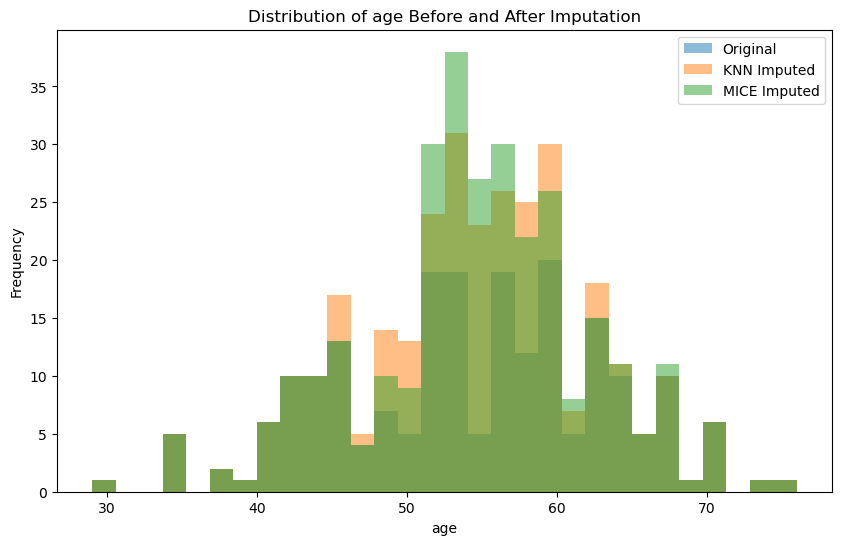

In [104]:
# Comparison of Imputation Techniques

# Compare Original and Imputed Data (Mean and Variance)
original_means = data.mean()
knn_means = data_knn_imputed.mean()
mice_means = data_mice_imputed.mean()

comparison = pd.DataFrame({
    "Original Mean": original_means,
    "KNN Imputed Mean": knn_means,
    "MICE Imputed Mean": mice_means
})

print("\nComparison of Means Before and After Imputation:")
print(comparison)

# Visualize Distribution of a Column Before and After Imputation
column_to_visualize = numerical_columns[0]  # Replace with the column you want to visualize

plt.figure(figsize=(10, 6))
plt.hist(data[column_to_visualize].dropna(), bins=30, alpha=0.5, label="Original")
plt.hist(data_knn_imputed[column_to_visualize], bins=30, alpha=0.5, label="KNN Imputed")
plt.hist(data_mice_imputed[column_to_visualize], bins=30, alpha=0.5, label="MICE Imputed")
plt.title(f"Distribution of {column_to_visualize} Before and After Imputation")
plt.xlabel(column_to_visualize)
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Balancing

In [106]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.utils import resample

In [108]:
# Load a Sample Dataset (Use your own file path)
data = pd.read_csv('heart.csv')
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168,NaN
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,NaN,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,NaN,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,NaN,1.000000


In [110]:
# Assuming we are creating an imbalanced classification dataset
# Select first 6 columns as predictors, and last column as outcome (you can try other number of columns yourself)
data = data.iloc[:, [0, 1, 2, 3, 4, 5, -1]]
data.head()

,age,sex,cp,trestbps,chol,fbs,target
0,63,1,1,145,233,1,0
1,67,1,4,160,286,0,1
2,67,1,4,120,229,0,0
3,37,1,3,130,250,0,0
4,41,0,2,130,204,0,0



Original Class Distribution:
target
0    220
1     83
Name: count, dtype: int64


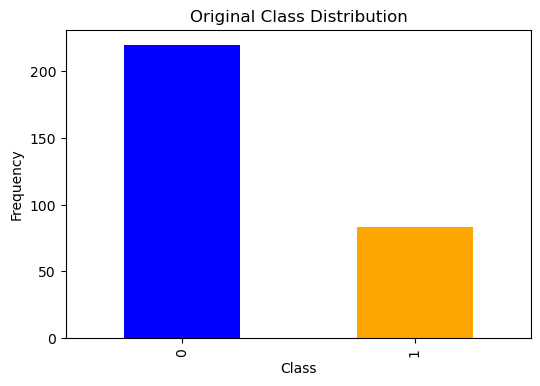

In [112]:
# Display Class Distribution
print("\nOriginal Class Distribution:")
print(data['target'].value_counts())

plt.figure(figsize=(6, 4))
data['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Original Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Random Oversampling

In [116]:
# Separate Minority and Majority Classes
majority_class = data[data['target'] == 0]
minority_class = data[data['target'] == 1]

# Oversample the Minority Class
minority_oversampled = resample(
    minority_class,
    replace=True,
    n_samples=len(majority_class),
    random_state=1
)


Class Distribution After Random Oversampling:
target
0    220
1    220
Name: count, dtype: int64


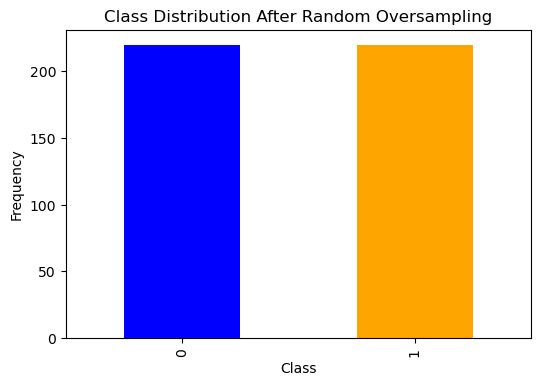

In [118]:
# Combine Oversampled Minority Class with Majority Class
data_oversampled = pd.concat([majority_class, minority_oversampled])

# Display Class Distribution After Oversampling
print("\nClass Distribution After Random Oversampling:")
print(data_oversampled['target'].value_counts())

plt.figure(figsize=(6, 4))
data_oversampled['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution After Random Oversampling")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Random Undersampling

In [122]:
# Undersample the Majority Class
majority_undersampled = resample(
    majority_class,
    replace=False,
    n_samples=len(minority_class),
    random_state=42
)

# Combine Undersampled Majority Class with Minority Class
data_undersampled = pd.concat([majority_undersampled, minority_class])


Class Distribution After Random Undersampling:
target
0    83
1    83
Name: count, dtype: int64


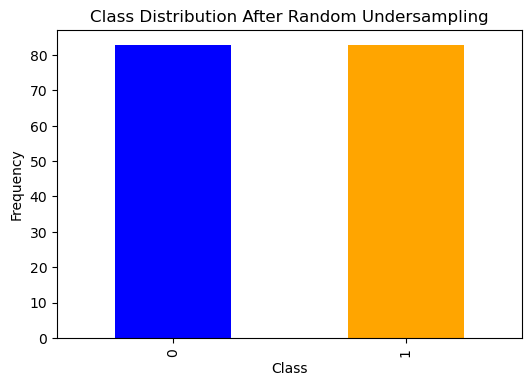

In [124]:
# Display Class Distribution After Undersampling
print("\nClass Distribution After Random Undersampling:")
print(data_undersampled['target'].value_counts())

plt.figure(figsize=(6, 4))
data_undersampled['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution After Random Undersampling")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Synthetic Minority Oversampling (SMOTE)

You may need to install imblearn by "pip install imblearn"

In [126]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority') 
data_synthetic, data_synthetic['target'] = smote.fit_resample(data.iloc[:, :-1], data['target'])


Class Distribution After Synthetic Oversampling:
target
0    220
1    220
Name: count, dtype: int64


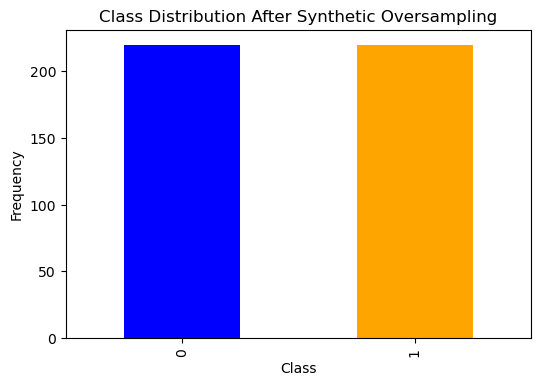

In [128]:
# Display Class Distribution After Synthetic Oversampling
print("\nClass Distribution After Synthetic Oversampling:")
print(data_synthetic['target'].value_counts())

plt.figure(figsize=(6, 4))
data_synthetic['target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution After Synthetic Oversampling")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

Summary of Balancing Techniques

In [133]:
print("\nSummary of Balancing Techniques:")
techniques = ["Original", "Random Oversampling", "Random Undersampling", "SMOTE"]
counts = [
    data['target'].value_counts().tolist(),
    data_oversampled['target'].value_counts().tolist(),
    data_undersampled['target'].value_counts().tolist(),
    data_synthetic['target'].value_counts().tolist()
]

summary_df = pd.DataFrame(counts, columns=["Class 0", "Class 1"], index=techniques)
print(summary_df)


Summary of Balancing Techniques:
                      Class 0  Class 1
Original                  220       83
Random Oversampling       220      220
Random Undersampling       83       83
SMOTE                     220      220


# Transformation

In [135]:
# Importing Required Libraries
import pandas as pd

In [137]:
# Load a Sample Dataset (Use your own file path)
data = pd.read_csv('heart.csv')
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168,NaN
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,NaN,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,NaN,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,NaN,1.000000


In [139]:
# One-Hot Encoding

# Convert Categorical Columns to One-Hot Encoding
data_one_hot = pd.get_dummies(data, columns=['thal'], drop_first=False, dtype=float)

print("\nOne-Hot Encoded Data:")
data_one_hot.head()


One-Hot Encoded Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,63,1,1,145,233,1,2,150,0,2.3,3,0,0,0.0,0.0,1.0,0.0,0.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,1,0.0,0.0,0.0,1.0,0.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2,0,0.0,0.0,0.0,0.0,1.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,0,0.0,0.0,0.0,1.0,0.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,0,0.0,0.0,0.0,1.0,0.0


# Feature Scaling

In [141]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Load a Sample Dataset (Use your own file path)
data = pd.read_csv('heart.csv')
data = data.iloc[:, :10]
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,63,1,1,145,233,1,2,150,0,2.3
1,67,1,4,160,286,0,2,108,1,1.5
2,67,1,4,120,229,0,2,129,1,2.6
3,37,1,3,130,250,0,0,187,0,3.5
4,41,0,2,130,204,0,2,172,0,1.4


Min-Max Scaling


Min-Max Scaled Data:
        age  sex    cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  0.25  0.481132  0.244292  1.0      1.0  0.603053    0.0   
1  0.791667  1.0  1.00  0.622642  0.365297  0.0      1.0  0.282443    1.0   
2  0.791667  1.0  1.00  0.245283  0.235160  0.0      1.0  0.442748    1.0   
3  0.166667  1.0  0.75  0.339623  0.283105  0.0      0.0  0.885496    0.0   
4  0.250000  0.0  0.50  0.339623  0.178082  0.0      1.0  0.770992    0.0   

    oldpeak  
0  0.370968  
1  0.241935  
2  0.419355  
3  0.564516  
4  0.225806  


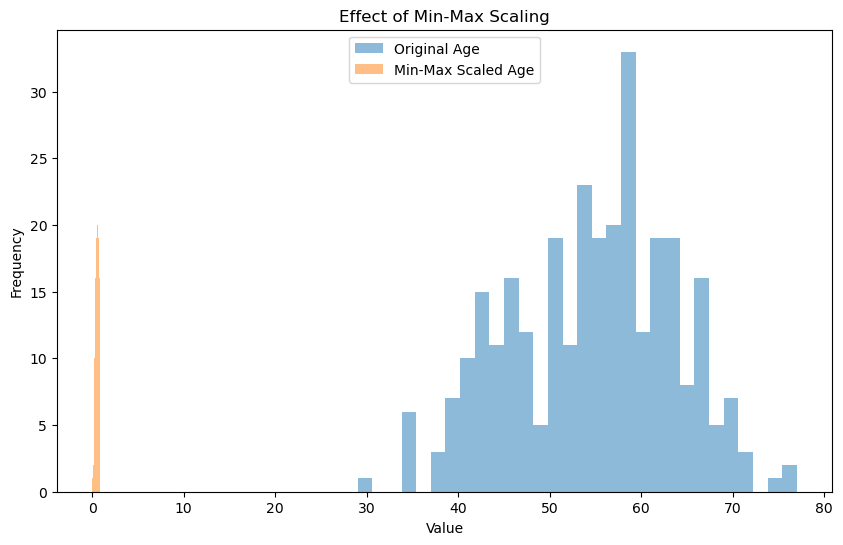

In [143]:
# Normalize the Data to [0, 1]
min_max_scaler = MinMaxScaler()
data_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)

print("\nMin-Max Scaled Data:")
print(data_min_max_scaled.head())

# Visualize the Effect of Min-Max Scaling
plt.figure(figsize=(10, 6))
plt.hist(data['age'], bins=30, alpha=0.5, label="Original Age")
plt.hist(data_min_max_scaled['age'], bins=30, alpha=0.5, label="Min-Max Scaled Age")
plt.title("Effect of Min-Max Scaling")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Standard Scaling


Standard Scaled Data:
        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.933840  0.691411 -2.054036  0.745781 -0.260087  2.394438  1.023554   
1  1.378211  0.691411  0.867903  1.592329  0.757388 -0.417635  1.023554   
2  1.378211  0.691411  0.867903 -0.665131 -0.336877 -0.417635  1.023554   
3 -1.954574  0.691411 -0.106077 -0.100766  0.066273 -0.417635 -1.003485   
4 -1.510203 -1.446318 -1.080056 -0.100766 -0.816818 -0.417635  1.023554   

    thalach     exang   oldpeak  
0  0.034808 -0.696631  1.068045  
1 -1.780616  1.435481  0.380229  
2 -0.872904  1.435481  1.325977  
3  1.634109 -0.696631  2.099771  
4  0.985744 -0.696631  0.294252  


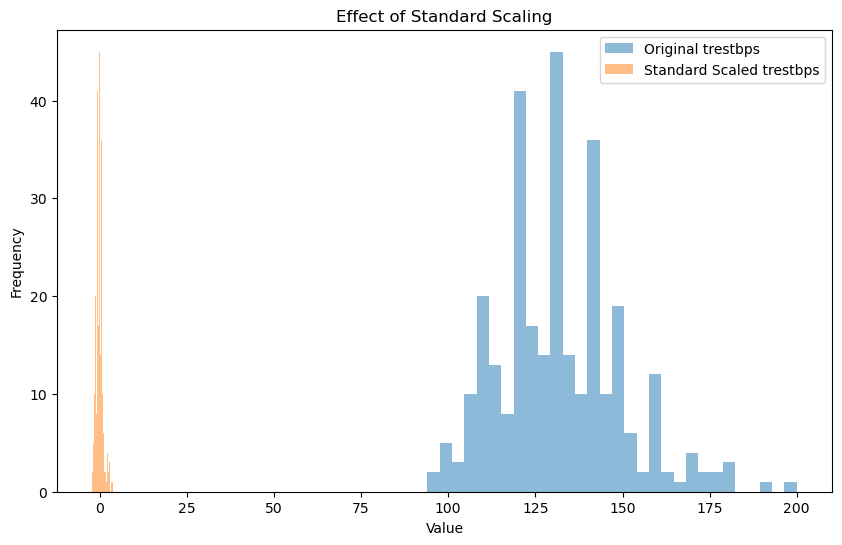

In [145]:
# Standardize the Data to Have Mean = 0 and Std = 1
standard_scaler = StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

print("\nStandard Scaled Data:")
print(data_standard_scaled.head())

# Visualize the Effect of Standard Scaling
plt.figure(figsize=(10, 6))
plt.hist(data['trestbps'], bins=30, alpha=0.5, label="Original trestbps")
plt.hist(data_standard_scaled['trestbps'], bins=30, alpha=0.5, label="Standard Scaled trestbps")
plt.title("Effect of Standard Scaling")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Robust Scaling


Robust Scaled Data:
        age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.538462  0.0 -1.0      0.75 -0.125000  1.0      0.5 -0.059701    0.0   
1  0.846154  0.0  0.5      1.50  0.703125  0.0      0.5 -1.313433    1.0   
2  0.846154  0.0  0.5     -0.50 -0.187500  0.0      0.5 -0.686567    1.0   
3 -1.461538  0.0  0.0      0.00  0.140625  0.0     -0.5  1.044776    0.0   
4 -1.153846 -1.0 -0.5      0.00 -0.578125  0.0      0.5  0.597015    0.0   

   oldpeak  
0   0.9375  
1   0.4375  
2   1.1250  
3   1.6875  
4   0.3750  


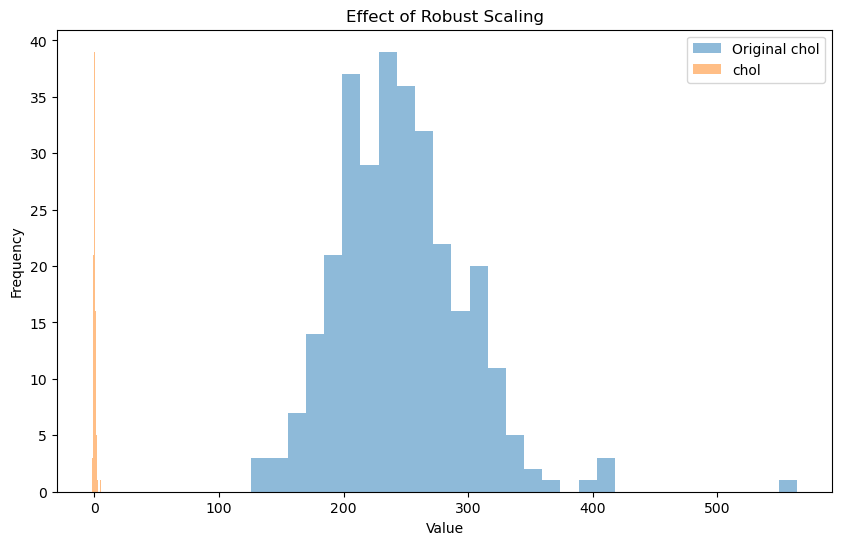

In [147]:
# Scale the Data Using Median and IQR (Handles Outliers)
robust_scaler = RobustScaler()
data_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(data), columns=data.columns)

print("\nRobust Scaled Data:")
print(data_robust_scaled.head())

# Visualize the Effect of Robust Scaling
plt.figure(figsize=(10, 6))
plt.hist(data['chol'], bins=30, alpha=0.5, label="Original chol")
plt.hist(data_robust_scaled['chol'], bins=30, alpha=0.5, label="chol")
plt.title("Effect of Robust Scaling")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

MaxAbs Scaling


MaxAbs Scaled Data:
        age  sex    cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.818182  1.0  0.25     0.725  0.413121  1.0      1.0  0.742574    0.0   
1  0.870130  1.0  1.00     0.800  0.507092  0.0      1.0  0.534653    1.0   
2  0.870130  1.0  1.00     0.600  0.406028  0.0      1.0  0.638614    1.0   
3  0.480519  1.0  0.75     0.650  0.443262  0.0      0.0  0.925743    0.0   
4  0.532468  0.0  0.50     0.650  0.361702  0.0      1.0  0.851485    0.0   

    oldpeak  
0  0.370968  
1  0.241935  
2  0.419355  
3  0.564516  
4  0.225806  


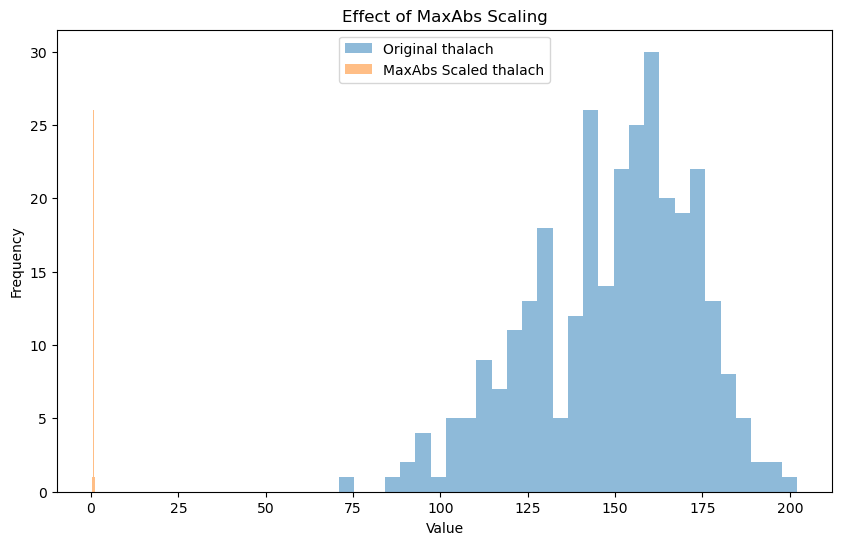

In [149]:
# Scale the Data Using Maximum Absolute Value
max_abs_scaler = MaxAbsScaler()
data_max_abs_scaled = pd.DataFrame(max_abs_scaler.fit_transform(data), columns=data.columns)

print("\nMaxAbs Scaled Data:")
print(data_max_abs_scaled.head())

# Visualize the Effect of MaxAbs Scaling
plt.figure(figsize=(10, 6))
plt.hist(data['thalach'], bins=30, alpha=0.5, label="Original thalach")
plt.hist(data_max_abs_scaled['thalach'], bins=30, alpha=0.5, label="MaxAbs Scaled thalach")
plt.title("Effect of MaxAbs Scaling")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Dimension Reduction

You may need to install the UMAP library by "pip install umap-learn"

https://umap-learn.readthedocs.io/en/latest/

In [153]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [154]:
# Load a Sample Dataset (Use your own file path)
data = pd.read_csv('CNN_last_layer.csv')
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Cell
0,0.269589,0.882393,0.849776,0.248127,0.189826,0.133994,0.718307,0.470374,0.221792,0.417210,1
1,0.701755,0.210722,0.154162,0.733085,0.876092,0.740730,0.848917,0.183955,0.706752,0.502703,3
2,0.236006,0.876621,0.765462,0.249200,0.157745,0.252707,0.784330,0.619892,0.271193,0.402279,1
3,0.788533,0.117179,0.288688,0.181769,0.443777,0.649655,0.576907,0.490122,0.603894,0.167771,2
4,0.824344,0.060856,0.159366,0.879005,0.966516,0.747485,0.779615,0.079464,0.401919,0.634110,3


The first 10 columns represent the first 10 features of the last layer of a CNN developed for a cell classification task (4 types of cells in total).

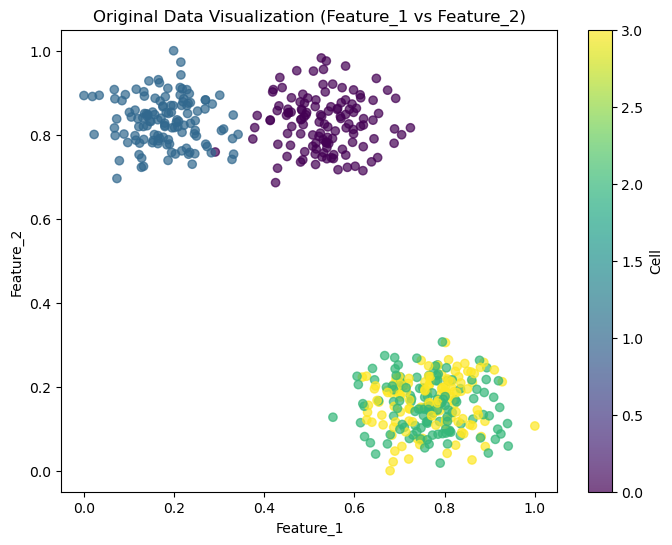

In [160]:
# Visualize the Original High-Dimensional Data Using Two Features
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature_1'], data['Feature_2'], c=data['Cell'], cmap='viridis', alpha=0.7)
plt.title("Original Data Visualization (Feature_1 vs Feature_2)")
plt.xlabel("Feature_1")
plt.ylabel("Feature_2")
plt.colorbar(label="Cell")
plt.show()

Principal Component Analysis (PCA)

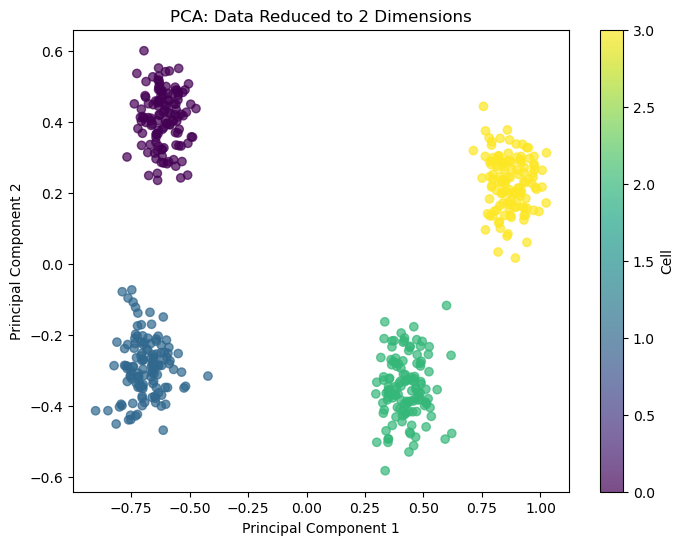

In [162]:
# Apply PCA to Reduce Dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.iloc[:, :-1])

# Visualize the PCA Results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cell'], cmap='viridis', alpha=0.7)
plt.title("PCA: Data Reduced to 2 Dimensions")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cell")
plt.show()

t-SNE (t-Distributed Stochastic Neighbor Embedding)

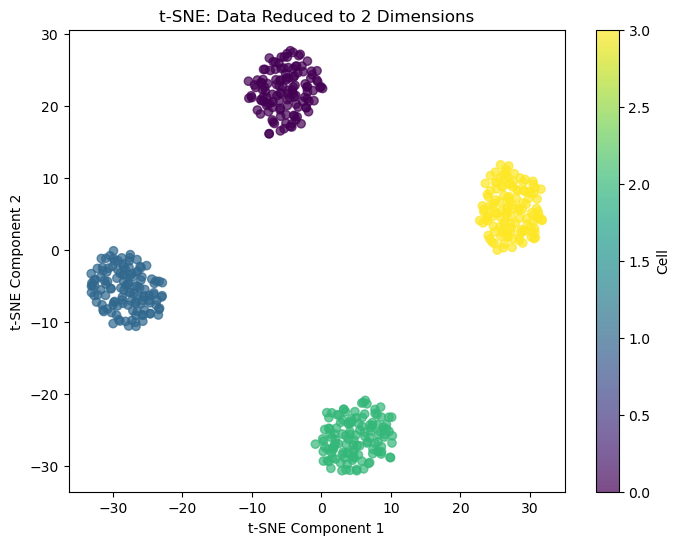

In [164]:
# Apply t-SNE to Reduce Dimensions to 2
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(data.iloc[:, :-1])

# Visualize the t-SNE Results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['Cell'], cmap='viridis', alpha=0.7)
plt.title("t-SNE: Data Reduced to 2 Dimensions")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cell")
plt.show()

UMAP (Uniform Manifold Approximation and Projection)

C:\Users\Admin\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


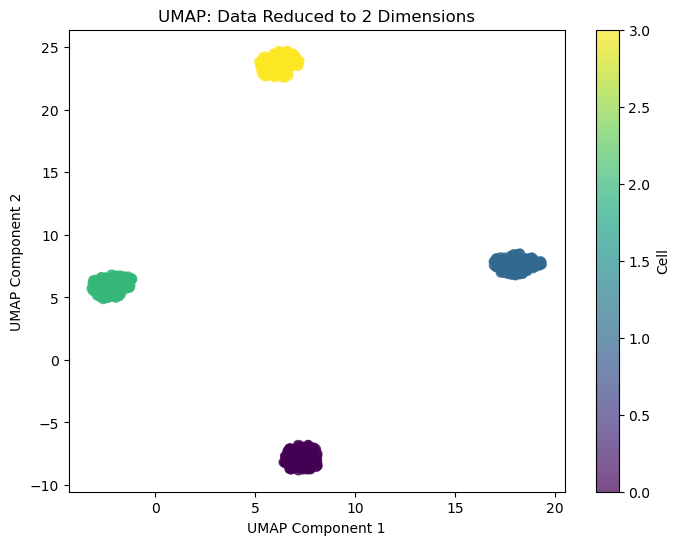

In [166]:
# Apply UMAP to Reduce Dimensions to 2
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(data.iloc[:, :-1])

# Visualize the UMAP Results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=data['Cell'], cmap='viridis', alpha=0.7)
plt.title("UMAP: Data Reduced to 2 Dimensions")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.colorbar(label="Cell")
plt.show()

# Practice

Try to find a dataset on Kaggle and conduct data preprocessing for it, e.g., the ECG Heartbeat categorization dataset - https://www.kaggle.com/datasets/shayanfazeli/heartbeat